### 1. DEFINE THE PROBLEM

#### Objective:
Analyze Uber ride data to uncover patterns in ride purpose, distance, and timing, and derive actionable insights for efficient trip planning and resource management.

#### Data Source:
https://media.geeksforgeeks.org/wp-content/uploads/20240919115958/UberDataset.csv
* Key columns (START_DATE, END_DATE, START, STOP, MILES, PURPOSE, CATEGORY)


#### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2. DATA ACQUISITION

#### Data Collection:

In [2]:
# Dataset
data = pd.read_csv('UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Potential Issues: Data Type for 'START_DATE', 'END_DATE' column

#### Data Understanding:

In [3]:
# Dimensionality of the Dataset
data.shape

(1155, 7)

In [4]:
# Summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
# Number of Missing Values in Dataset
data.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [6]:
# Datatype of each Column
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

## 3. DATA CLEANING AND PREPROCESSING

#### Handle Missing Data

In [7]:
# Replace the PURPOSE with N/A where Null 
data['PURPOSE'] = data['PURPOSE'].fillna('N/A')

In [8]:
# Removing the row with Null values
data.dropna(inplace=True)

In [9]:
# Removing the rows with duplicate values
data.drop_duplicates(inplace=True)

In [10]:
# Dataset Dimensions
data.shape

(1154, 7)

In [11]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,N/A
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### Data Transformation

In [12]:
# # Changing the START_DATE and END_DATE to the date_time format
data['START_DATE'] = pd.to_datetime(data['START_DATE'],errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

In [13]:
print(data.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              N/A  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  


In [14]:
# Replace 'Unknown Location' with 'N/A' 
data['START'] = data['START'].replace('Unknown Location', 'N/A')
data['STOP'] = data['STOP'].replace('Unknown Location', 'N/A')

In [15]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

#### Feature Selection

In [16]:
# Create a 'DATE' and 'TIME' column
data['DATE'] = pd.DatetimeIndex(data['START_DATE']).date
data['TIME'] = pd.DatetimeIndex(data['START_DATE']).hour

In [17]:
# Create a 'DAY_OF_WEEK' column
data['DAY_OF_WEEK'] = data['START_DATE'].dt.day_name()

In [18]:
# Create a 'DAY_NIGHT' column
data['DAY_NIGHT'] = pd.cut(x=data['TIME'], bins = [-1,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])

In [19]:
# Create a 'TRIP_DURATION' column
data['TRIP_DURATION'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds()/60

In [20]:
# Detect and Remove Outliers in MILES Column (IQR Method) #
Q1 = data['MILES'].quantile(0.25)  # First quartile
Q3 = data['MILES'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['MILES'] < lower_bound) | (data['MILES'] > upper_bound)]
print(f"Number of Outliers in MILES: {len(outliers)}")

# Remove outliers
data = data[(data['MILES'] >= lower_bound) & (data['MILES'] <= upper_bound)]
print(f"Dataset size after outlier removal: {data.shape}")


Number of Outliers in MILES: 77
Dataset size after outlier removal: (1077, 12)


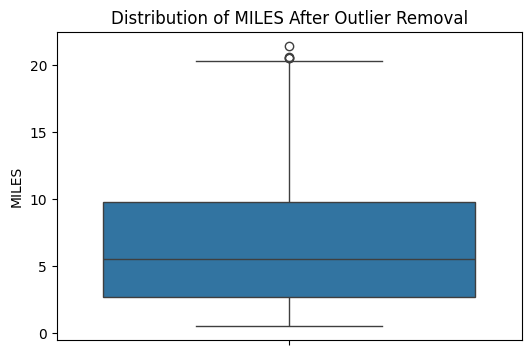

In [21]:

# Boxplot after outlier removal
plt.figure(figsize=(6, 4))
sns.boxplot(data['MILES'])
plt.title("Distribution of MILES After Outlier Removal")
plt.show()

In [22]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_OF_WEEK,DAY_NIGHT,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Friday,Night,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1,Saturday,Morning,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Saturday,Night,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Tuesday,Evening,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Wednesday,Evening,4.0


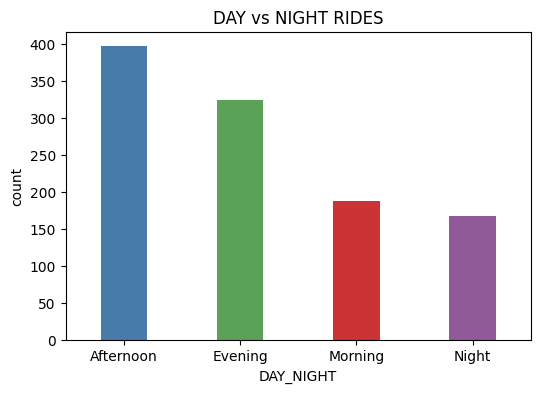

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='DAY_NIGHT', width=0.4,hue = 'DAY_NIGHT', palette='Set1', order=data['DAY_NIGHT'].value_counts().index)
plt.title('DAY vs NIGHT RIDES')
plt.show()

## 4. EXPLORATORY DATA ANALYSIS (EDA)

#### Descriptive Statistics

In [24]:
# Count of Unique Values for CATEGORY Column
data['CATEGORY'].value_counts()

CATEGORY
Business    1008
Personal      69
Name: count, dtype: int64

In [25]:
# Count of Unique Values for PURPOSE Column
data['PURPOSE'].value_counts()

PURPOSE
N/A                469
Meeting            172
Meal/Entertain     156
Errand/Supplies    127
Customer Visit      82
Temporary Site      46
Between Offices     17
Moving               4
Airport/Travel       3
Charity ($)          1
Name: count, dtype: int64

In [26]:
# Count of Unique Values for DAY-NIGHT Column
data['DAY_NIGHT'].value_counts()

DAY_NIGHT
Afternoon    397
Evening      325
Morning      188
Night        167
Name: count, dtype: int64

In [27]:
# Minimum, Maximum, Mean , Median of MILES column
print('Miles (Minimum) : ',data['MILES'].min())
print('Miles (Maximum) : ',data['MILES'].max())
print('Miles (Mean) : ',data['MILES'].mean())
print('Miles (Median) : ',data['MILES'].median())

Miles (Minimum) :  0.5
Miles (Maximum) :  21.4
Miles (Mean) :  6.5997214484679665
Miles (Median) :  5.5


#### Data Visualization

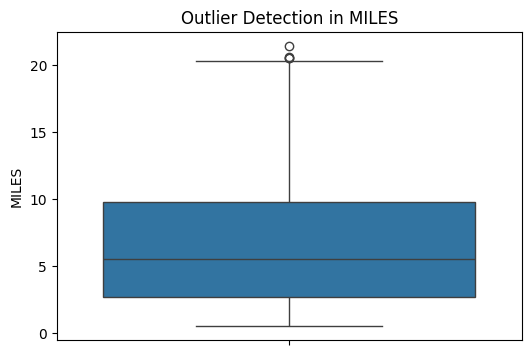

In [28]:
# Boxplot for Outlier Detection in MILES
plt.figure(figsize=(6, 4))
sns.boxplot(data['MILES'])
plt.title('Outlier Detection in MILES')
plt.show()

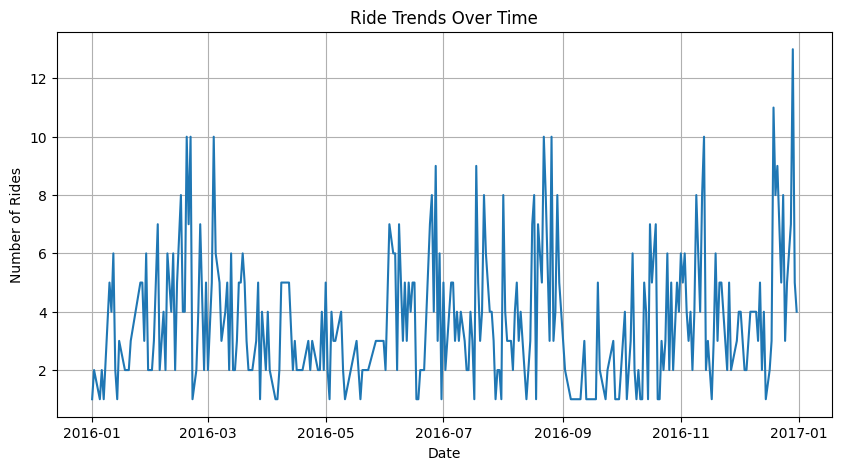

In [29]:
#  Line Plot for Ride Trends Over Time
plt.figure(figsize=(10, 5))
data.groupby('DATE').size().plot(title='Ride Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

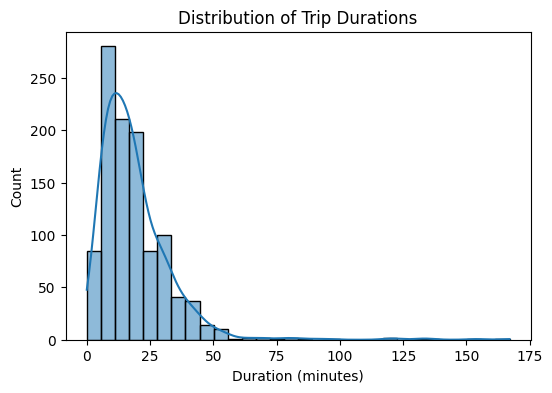

In [30]:
# Plotting trip duration distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['TRIP_DURATION'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.show()

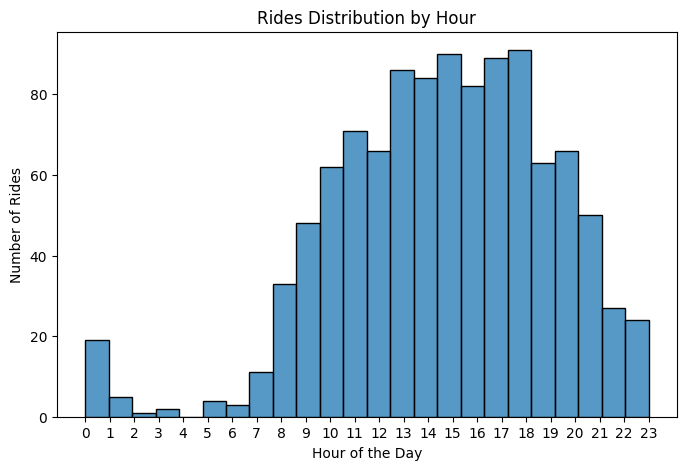

In [31]:
# Peak Hour Analysis
plt.figure(figsize=(8, 5))
sns.histplot(data['TIME'], bins = 24)
plt.title('Rides Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(0, 24), labels=range(0, 24)) 
plt.show()

START        STOP       
Morrisville  Cary           75
N/A          N/A            73
Cary         Morrisville    66
             Cary           52
             Durham         36
Durham       Cary           31
Islamabad    N/A            28
N/A          Islamabad      28
Lahore       Lahore         27
Islamabad    Islamabad      24
dtype: int64


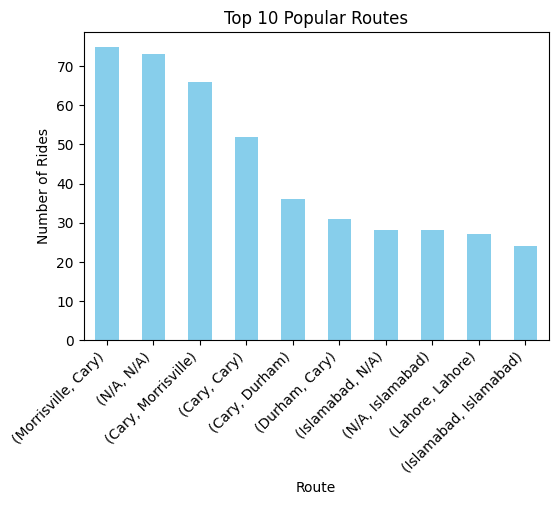

In [32]:
TOP_ROUTES = data.groupby(['START', 'STOP']).size().sort_values(ascending=False).head(10)
print(TOP_ROUTES)

# Visualizing popular routes
plt.figure(figsize=(6, 4))
TOP_ROUTES.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Routes')
plt.xlabel('Route')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.show()

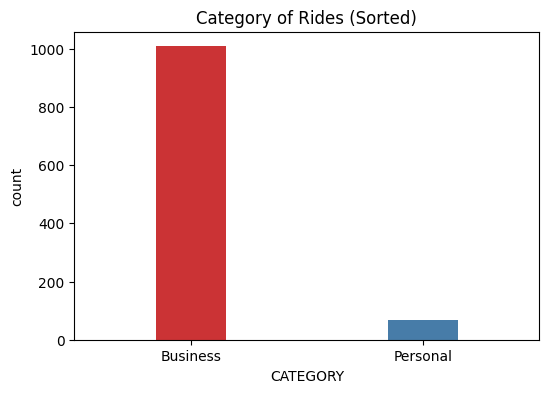

In [33]:
# Count Plot for Category
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='CATEGORY', width=0.3, hue='CATEGORY', palette = 'Set1', legend=False)
plt.title('Category of Rides (Sorted)')
plt.xticks()
plt.show()

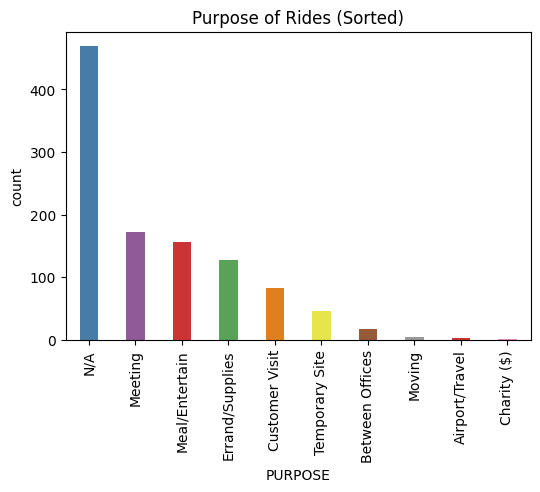

In [34]:
# Count Plot for Purpose
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='PURPOSE', hue='PURPOSE', legend=False, palette = 'Set1', order=data['PURPOSE'].value_counts().index , width=0.4)
plt.xticks(rotation=90)
plt.title('Purpose of Rides (Sorted)')
plt.show()

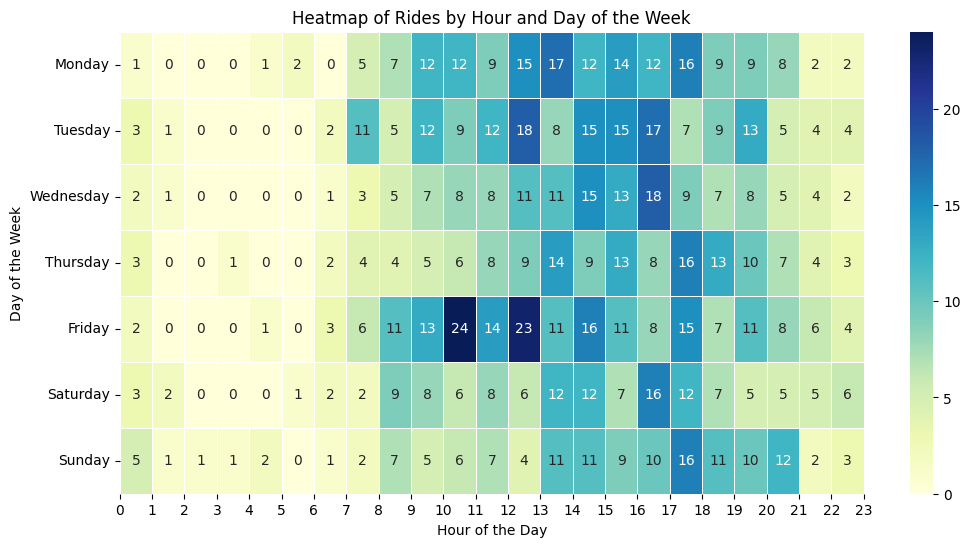

In [35]:
# Heatmap for Hourly Trends (e.g., rides by hour and day of the week).

# Pivot Table for Rides by Hour and Day of Week
hourly_trends = data.pivot_table(
    index='DAY_OF_WEEK',
    columns='TIME',
    values='MILES',  
    aggfunc='count' 
).fillna(0)

# Reorder the days for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_trends = hourly_trends.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_trends, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Rides by Hour and Day of the Week')
# Fixing x-axis labels to show whole numbers
plt.xticks(ticks=np.arange(0, 24), labels=np.arange(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

C:\Users\nishu\AppData\Local\Temp\ipykernel_25244\1989048499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_daynight = data.groupby(['DAY_NIGHT', 'CATEGORY']).size().unstack()


<Figure size 800x500 with 0 Axes>

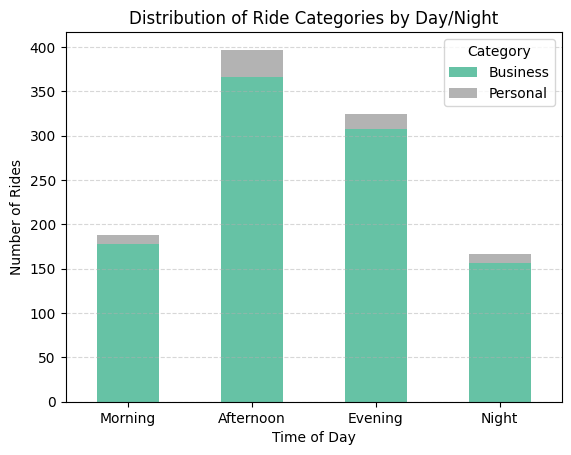

In [36]:
# Stacked Bar Chart showing CATEGORY by DAY_NIGHT

# Group data by 'DAY_NIGHT' and 'CATEGORY' for the stacked bar chart
category_daynight = data.groupby(['DAY_NIGHT', 'CATEGORY']).size().unstack()

plt.figure(figsize=(8, 5))
category_daynight.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Distribution of Ride Categories by Day/Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

## 5. BASIC STATISTICAL ANALYSIS

#### Encoding Categorical Data

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encoding CATEGORY
encoder = LabelEncoder()
data['CATEGORY_ENCODED'] = encoder.fit_transform(data['CATEGORY'])

# Encoding PURPOSE
data['PURPOSE_ENCODED'] = encoder.fit_transform(data['PURPOSE'])

# Encoding DAY-NIGHT
data['DAY_NIGHT_ENCODED'] = encoder.fit_transform(data['DAY_NIGHT'])

data[['CATEGORY', 'CATEGORY_ENCODED', 'PURPOSE', 'PURPOSE_ENCODED', 'DAY_NIGHT', 'DAY_NIGHT_ENCODED']].head()

,CATEGORY,CATEGORY_ENCODED,PURPOSE,PURPOSE_ENCODED,DAY_NIGHT,DAY_NIGHT_ENCODED
0,Business,0,Meal/Entertain,5,Night,3
1,Business,0,N/A,8,Morning,2
2,Business,0,Errand/Supplies,4,Night,3
3,Business,0,Meeting,6,Evening,1
5,Business,0,Meal/Entertain,5,Evening,1


#### Correlation Analysis

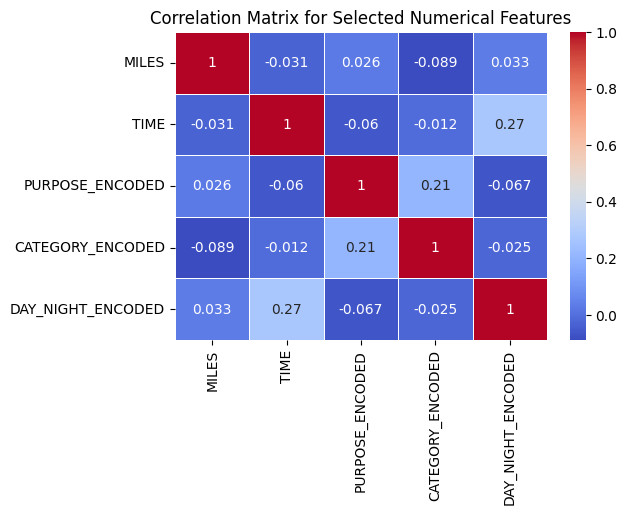

In [38]:
# Selecting specific numeric columns for correlation
selected_columns = ['MILES', 'TIME', 'PURPOSE_ENCODED', 'CATEGORY_ENCODED', 'DAY_NIGHT_ENCODED']  # Add more numeric columns if needed
correlation_matrix = data[selected_columns].corr()

# Correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Numerical Features')
plt.show()

#### Key Observations :
* MILES has weak correlations with all features (values close to 0), indicating that distance traveled is not strongly tied to encoded categories, purpose, or time.
* time has a strong negative correlation with day-night_ENCODED (-0.89), suggesting that night rides are linked to lower time values (possibly earlier hours).
* CATEGORY_ENCODED and PURPOSE_ENCODED show a moderate positive correlation (0.20), which may indicate certain categories are linked to specific purposes.

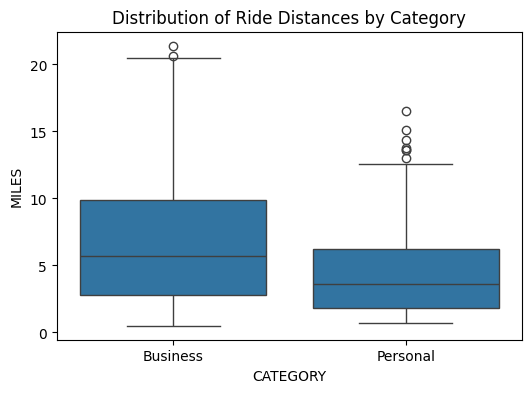

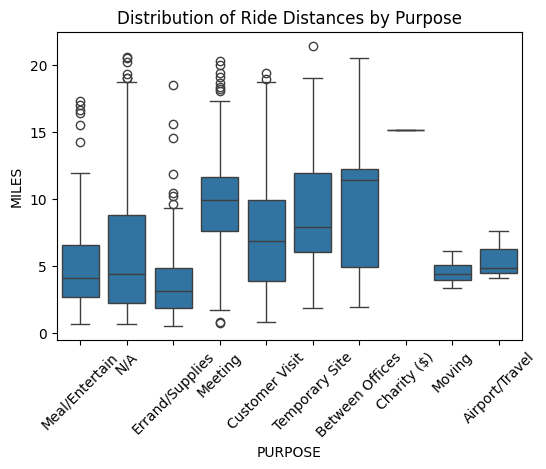

In [39]:
#  Ride Distance Analysis (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='CATEGORY', y='MILES', data=data)
plt.title('Distribution of Ride Distances by Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='PURPOSE', y='MILES', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Ride Distances by Purpose')
plt.show()

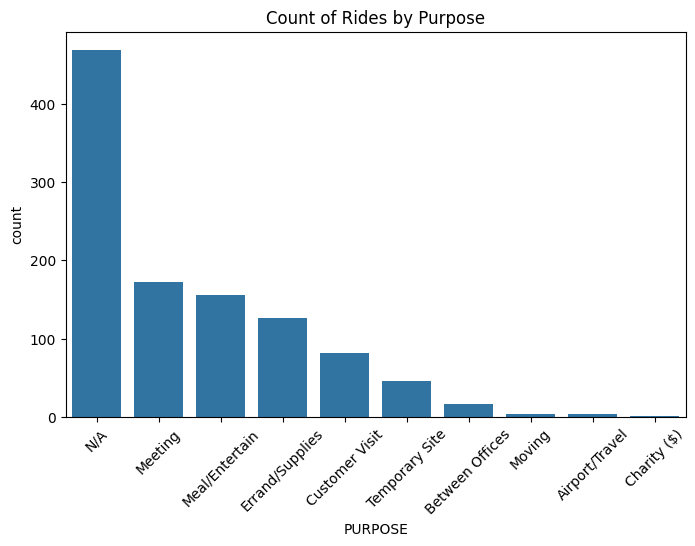

In [40]:
#  Purpose Analysis (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x='PURPOSE', data=data, order=data['PURPOSE'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Rides by Purpose')
plt.show()

In [41]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_OF_WEEK,DAY_NIGHT,TRIP_DURATION,CATEGORY_ENCODED,PURPOSE_ENCODED,DAY_NIGHT_ENCODED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Friday,Night,6.0,0,5,3
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,N/A,2016-01-02,1,Saturday,Morning,12.0,0,8,2
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Saturday,Night,13.0,0,4,3
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Tuesday,Evening,14.0,0,6,1
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,Wednesday,Evening,4.0,0,5,1


In [42]:
# Save cleaned dataset for Tableau
data.to_csv("Cleaned_UberDataset.csv", index=False)

## 6. INSIGHTS AND INTERPRETATION

#### Interpret Findings

* Weak Correlation Between Distance and Other Variables
    * Distance alone may not be a key factor in determining ride purpose or category.
* Strong Negative Correlation Between time and day-night (-0.89)
    * Insight: Time of ride is a clear indicator of whether a trip is categorized as day or night
* Moderate Correlation Between PURPOSE_ENCODED and CATEGORY_ENCODED (0.20)


Ride Trends Over Time (Line Chart)
* Purpose: Shows how the number of Uber rides fluctuates over time.
* Insights:
    * The number of rides varies significantly, indicating no clear upward or downward trend.
    * There are occasional spikes, possibly linked to specific events, holidays, or weekends.
    * A few periods show very low ride counts, suggesting possible data gaps, off-peak seasons, or unusual patterns.

Distribution of Trip Durations (Histogram)
* Purpose: Displays how trip durations are distributed.
* Insights:
    * The distribution is right-skewed, meaning most trips are short (under 30 minutes), while longer trips are rare.
    * A few extreme values suggest occasional long-distance rides or outliers.

Rides Distribution by Hour (Bar Chart)
* Purpose: Highlights the volume of Uber rides across different hours of the day.
* Insights:
    * Peak hours are between 12 PM and 7 PM, suggesting high demand during lunchtime, afternoon, and early evening — likely linked to commuting patterns or social activities.
    * Low activity occurs between 2 AM and 6 AM, aligning with typical off-peak hours.

Top 10 Popular Routes (Bar Chart)
* Purpose: Displays the most frequently traveled routes in the dataset.
* Insights:
    * The most popular route is (N/A, N/A), which could indicate missing or unclassified data.
Morrisville ↔ Cary and Cary ↔ Morrisville are among the top routes, suggesting a significant volume of travel between these locations.
    * Other common routes include Cary ↔ Durham and N/A ↔ Islamabad, indicating rides spanning different cities or regions.

Category of Rides (Bar Chart)
* Purpose: Shows the distribution of Uber rides between business and personal categories.
* Insights:
    * The majority of rides are categorized as Business, significantly outnumbering Personal rides.
    * This suggests that Uber is primarily used for corporate travel rather than personal trips in this dataset.

Purpose of Rides (Bar Chart)
* Purpose: Analyzes the reasons for Uber rides.
* Insights:
    * A large portion of rides are labeled as N/A, indicating missing or unrecorded purposes.
    * Among recorded purposes, the most common are Meetings, Meal/Entertainment, and Errand/Supplies, suggesting a mix of professional and personal use.
    * Charity, Commute, and Airport Travel have the lowest ride counts, indicating that Uber is not frequently used for these purposes in this dataset.

Heatmap of Rides by Hour and Day of the Week
* Purpose: Visualizes ride volume across different hours and days.
* Insights:
    * Peak ride activity is observed on Friday afternoons and evenings, likely due to end-of-week travel and social outings.
    * Midday hours (12 PM - 6 PM) show moderate to high ride volumes across most weekdays, aligning with work commutes and lunch hours.
    * Early morning hours (12 AM - 6 AM) have significantly lower ride activity, indicating off-peak times.

Distribution of Ride Categories by Day/Night
* Purpose: Shows how business and personal rides vary across different times of the day.
* Insights:
    * Afternoon and evening hours have the highest ride volume, suggesting peak demand for both business and personal travel.
    * Business rides dominate all time periods, but personal rides are slightly more frequent in the evening and night.
    * Morning rides are significantly lower, indicating fewer early-day travel needs.

## 7. REPORTING AND VISUALISATION

#### Create Visual Summaries

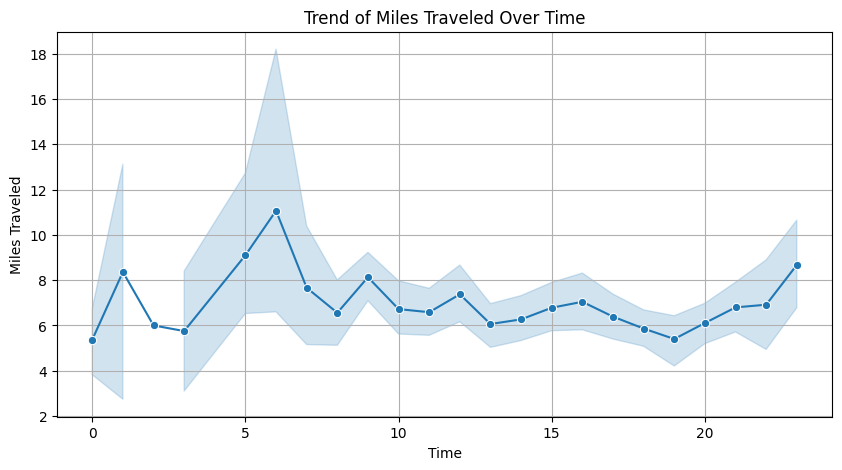

In [43]:
# Time Series Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='TIME', y='MILES', data=data, marker='o')
plt.title('Trend of Miles Traveled Over Time')
plt.xlabel('Time')
plt.ylabel('Miles Traveled')
plt.grid(True)
plt.show()

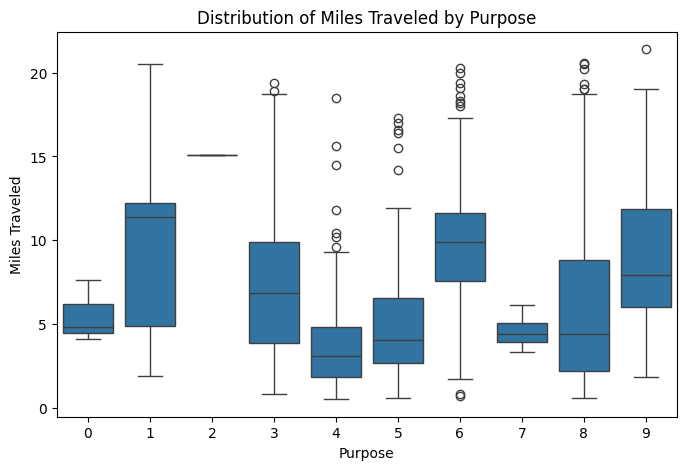

In [44]:
# Distance by Purpose
plt.figure(figsize=(8, 5))
sns.boxplot(x='PURPOSE_ENCODED', y='MILES', data=data)
plt.title('Distribution of Miles Traveled by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles Traveled')
plt.show()

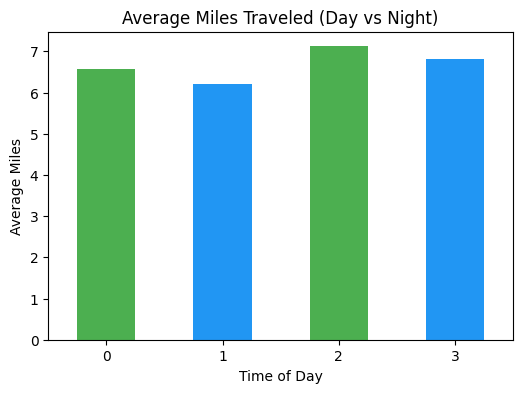

In [45]:
# Average Distance (Day vs Night)
avg_miles = data.groupby('DAY_NIGHT_ENCODED')['MILES'].mean()

plt.figure(figsize=(6, 4))
avg_miles.plot(kind='bar', color=['#4CAF50', '#2196F3'])
plt.title('Average Miles Traveled (Day vs Night)')
plt.xlabel('Time of Day')
plt.ylabel('Average Miles')
plt.xticks(rotation=0)
plt.show()